<a href="https://colab.research.google.com/github/KunalDM1999/ML-LEARNINGS-/blob/main/Assignement_8A%26B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
path='/content/data_for_large_scale.csv'
df=pd.read_csv(path)
X=df.drop('Target',axis=1)
y=df['Target']
X_array = X.values
y_array = y.values
X_train, X_test, y_train, y_test = train_test_split(X_array, y_array, test_size=0.3, random_state=10)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((63000, 10), (27000, 10), (63000,), (27000,))

In [ ]:
# prompt: Reshape the dataset in such a way that each entry of data has 90 samples

# Reshape the data
samples_per_entry = 90
num_entries_train = X_train.shape[0] // samples_per_entry
num_entries_test = X_test.shape[0] // samples_per_entry

X_train_reshaped = X_train[:num_entries_train * samples_per_entry].reshape(num_entries_train, samples_per_entry, X_train.shape[1])
y_train_reshaped = y_train[:num_entries_train * samples_per_entry].reshape(num_entries_train, samples_per_entry)

X_test_reshaped = X_test[:num_entries_test * samples_per_entry].reshape(num_entries_test, samples_per_entry, X_test.shape[1])
y_test_reshaped = y_test[:num_entries_test * samples_per_entry].reshape(num_entries_test, samples_per_entry)


X_train_reshaped.shape, X_test_reshaped.shape, y_train_reshaped.shape, y_test_reshaped.shape


((700, 90, 10), (300, 90, 10), (700, 90), (300, 90))

In [ ]:
# Initialize the model
model = SGDRegressor(random_state=10)

# Set number of epochs for the training process
num_epochs = 100 # Example of a high number of epochs for demonstration

# Number of entries
num_entries_train = X_train_reshaped.shape[0]

# Training loop
for epoch in range(num_epochs):
    for i in range(num_entries_train):
        X_batch = X_train_reshaped[i].reshape(-1, X_train_reshaped.shape[-1])  # Flatten to (90, 10)
        y_batch = y_train_reshaped[i].flatten()  # Flatten to (90,)
        model.partial_fit(X_batch, y_batch)

    # Print the coefficient for feature-5 after the 5th epoch
    if epoch == 4:  # 5th iteration (0-indexed)
        # Check if there are enough features
        if model.coef_.shape[0] > 4:  # Check if there is a 5th feature
            coefficient_feature5 = model.coef_[4]
            print("Coefficient for feature-5 after the 5th iteration:", coefficient_feature5)
        else:
            print("The model does not have enough features to access feature-5.")


# Make predictions
X_test_flattened = X_test_reshaped.reshape(-1, X_test_reshaped.shape[-1])
y_test_flattened = y_test_reshaped.flatten()
y_pred = model.predict(X_test_flattened)

# Calculate metrics
mse = mean_squared_error(y_test_flattened, y_pred)
r2 = r2_score(y_test_flattened, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Coefficient for feature-5 after the 5th iteration: 76.46726120393859
Mean Squared Error: 0.30513861636369993
R-squared Score: 0.9999919976041596


In [ ]:
# prompt: How many fetaures are there in the dataset

print("Number of features:", X_batch.shape[1],X_test_flattened.shape[1])


Number of features: 10 10


In [ ]:
# prompt: What is the value of intercept you got after training the model using SGDRegressor?(select the closest answer)

print("Intercept:", model.intercept_)


Intercept: [-0.0011893]


In [ ]:

# Assuming 'feature-3' is the feature at index 2 (0-indexed)
coefficient_feature3 = model.coef_[2]
print("Coefficient for feature-3:", coefficient_feature3)


Coefficient for feature-3: 81.24132838661444


In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Define the URL of the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00246/3D_spatial_network.txt"

# Initialize StandardScaler and SGDRegressor
scaler = StandardScaler()
model = SGDRegressor(random_state=10)

# Initialize empty lists to store data
X = []
y = []

# Load data in chunks
chunk_size = 20000
chunk_iter = pd.read_csv(url, header=None, iterator=True, chunksize=chunk_size)

# Initialize total_samples to 0
total_samples = 0

for chunk in chunk_iter:
    # Extract features and target
    # Column names in dataset: OSM_ID, LONGITUDE, LATITUDE, ALTITUDE (in this order)
    chunk.columns = ['OSM_ID', 'LONGITUDE', 'LATITUDE', 'ALTITUDE']

    # Drop OSM_ID as it's not a feature
    chunk = chunk.drop(columns=['OSM_ID'])

    # Handle missing values by dropping or imputing (assuming missing values in ALTITUDE)
    # For simplicity, we'll drop rows with missing ALTITUDE values
    chunk = chunk.dropna()

    # Count the number of samples in the current chunk
    num_samples_chunk = chunk.shape[0]

    # Add the count to the total samples
    total_samples += num_samples_chunk

    # Separate features and target
    X_chunk = chunk[['LONGITUDE', 'LATITUDE']]
    y_chunk = chunk['ALTITUDE']

    # Convert to numpy arrays
    X_chunk_array = X_chunk.to_numpy()
    y_chunk_array = y_chunk.to_numpy()

    # Scale the data using partial_fit
    scaler.partial_fit(X_chunk_array)

    # Transform the data
    X_chunk_scaled = scaler.transform(X_chunk_array)

    # Append the processed data to the list
    X.append(X_chunk_scaled)
    y.append(y_chunk_array)

print("Total number of samples in the dataset:", total_samples)

# Convert lists to numpy arrays
X_array = np.vstack(X)
y_array = np.concatenate(y)

# Train the model using partial_fit
num_epochs = 5  # Define the number of epochs
for epoch in range(num_epochs):
    model.partial_fit(X_array, y_array)

Total number of samples in the dataset: 434874


In [ ]:
# Train the model using partial_fit
num_epochs = 7  # Define the number of epochs
for epoch in range(num_epochs):
    model.partial_fit(X_array, y_array)

# Print the intercept after the 7th iteration
print("Intercept after the 7th iteration:", model.intercept_)
# Print the coefficient for longitude (assuming it's the first feature at index 0)
print("Coefficient for longitude after the 7th iteration:", model.coef_[0])

Intercept after the 7th iteration: [21.86956596]
Coefficient for longitude after the 7th iteration: 2.594651769082874


In [ ]:
# Step 1: Load the dataset and split it
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Step 2: Scale the data using Normalizer
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Use KNeighborsClassifier to build the model
from sklearn.neighbors import KNeighborsClassifier
K = 3 # Set the value of K
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9666666666666667


In [ ]:
# prompt: Compute wieghted F1 score value for k=3.(Keep parameter average='weighted') consider above code do shortly

from sklearn.metrics import f1_score

# Calculate weighted F1-score
f1_weighted = f1_score(y_test, y_pred, average='weighted')
print("Weighted F1-score:", f1_weighted)


Weighted F1-score: 0.9671111111111111


In [ ]:
from sklearn import svm
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV

def compute_GridSearchCV(kernel, C_values):
    # Load the Iris dataset
    iris = load_iris()
    X = iris.data
    y = iris.target

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Define the SVM model
    model = svm.SVC(gamma='auto', random_state=0)

    # Define the parameter grid for GridSearchCV
    param_grid = {
        'kernel': kernel,
        'C': C_values
    }

    # Set up GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=4, scoring='accuracy', n_jobs=-1)

    # Fit GridSearchCV to the training data
    grid_search.fit(X_train, y_train)

    # Return the mean cross-validated score of the best estimator
    return grid_search.best_score_

# Example usage
kernels = ['linear', 'rbf']
C_values = [1, 15, 25]
print(compute_GridSearchCV(kernels, C_values))


0.9807692307692308


In [ ]:
df=pd.read_csv('/content/Social_Network_Ads.csv')
df.head()


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
# Split the dataset
X = df.drop('Purchased', axis=1)
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit a linear SVM
clf = svm.SVC(kernel='linear', random_state=0)
clf.fit(X_train, y_train)


SVC(kernel='linear', random_state=0)

In [ ]:

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9


In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[66  2]
 [ 8 24]]


In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target

# Select the first 20,000 samples for training and the next 5,000 for testing
X_train, X_test = X[:20000], X[20000:25000]
y_train, y_test = y[:20000], y[20000:25000]

# Create the pipeline
pipeline = make_pipeline(
    MinMaxScaler(),
    SVC(kernel='linear', decision_function_shape='ovr', class_weight=None)
)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('svc', SVC(kernel='linear'))])

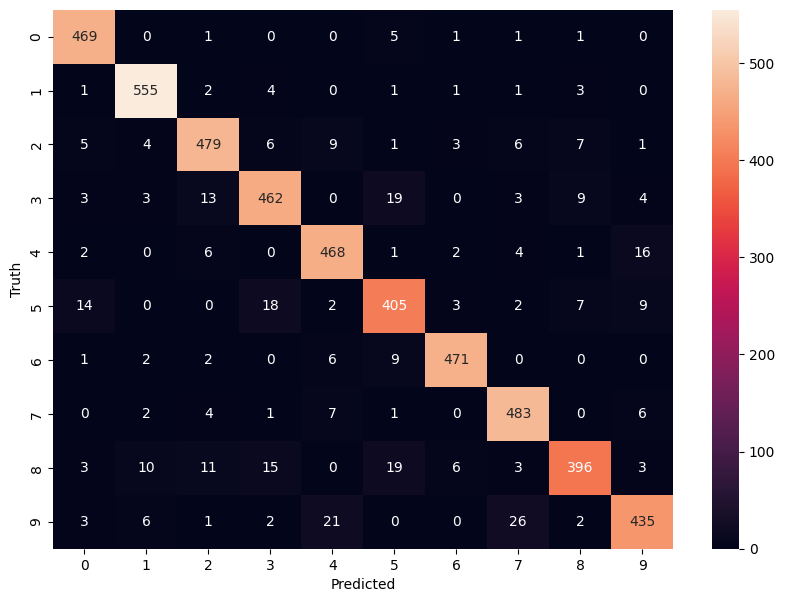

In [ ]:
# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Import necessary library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


In [ ]:
# prompt: What is the sum of the main diagonal elements

# Calculate the sum of the main diagonal elements
sum_diagonal = np.trace(cm)

print("Sum of the main diagonal elements:", sum_diagonal)


Sum of the main diagonal elements: 4623


In [ ]:
CR = classification_report(y_test, y_pred)
print('Classification report \n')
print(CR)

Classification report 

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       478
           1       0.95      0.98      0.97       568
           2       0.92      0.92      0.92       521
           3       0.91      0.90      0.90       516
           4       0.91      0.94      0.92       500
           5       0.88      0.88      0.88       460
           6       0.97      0.96      0.96       491
           7       0.91      0.96      0.94       504
           8       0.93      0.85      0.89       466
           9       0.92      0.88      0.90       496

    accuracy                           0.92      5000
   macro avg       0.92      0.92      0.92      5000
weighted avg       0.92      0.92      0.92      5000



In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target
# Use x_train, x_test, y_train, and y_test for consistency
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Create the pipeline
pipeline = make_pipeline(
    MinMaxScaler(),
    SVC(kernel='poly',degree = 3, decision_function_shape='ovr', class_weight='balanced', C=10)
)

# Fit the pipeline to the training data using the variables from train_test_split
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)
CR = classification_report(y_test, y_pred)
print('Classification report \n')
print(CR)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Classification report 

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3463
           1       0.98      0.99      0.98      3927
           2       0.96      0.97      0.97      3520
           3       0.97      0.96      0.97      3551
           4       0.97      0.98      0.98      3333
           5       0.97      0.97      0.97      3144
           6       0.98      0.99      0.99      3490
           7       0.98      0.98      0.98      3718
           8       0.97      0.96      0.96      3344
           9       0.97      0.96      0.97      3510

    accuracy                           0.97     35000
   macro avg       0.97      0.97      0.97     35000
weighted avg       0.97      0.97      0.97     35000



In [ ]:
from sklearn import svm
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def compute_score(X_train, y_train, X_test, y_test):
    # Define the SVM model
    model = svm.SVC(kernel='poly', C=10, gamma='auto')

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Compute the accuracy score
accuracy = compute_score(X_train, y_train, X_test, y_test)

# Print the accuracy score
print("Accuracy Score:", accuracy)


Accuracy Score: 1.0


In [ ]:
from sklearn import svm
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def compute_score(X_train, y_train, X_test, y_test):
    # Define the SVM model
    model = svm.SVC(kernel='sigmoid', C=25, gamma='auto')

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Compute the accuracy score
accuracy = compute_score(X_train, y_train, X_test, y_test)

# Print the accuracy score
print("Accuracy Score:", accuracy)


Accuracy Score: 0.28888888888888886


In [ ]:
# prompt: Import the iris dataset and drop the rows where class=Iris-setosa. Apply a pipeline containing a MinMaxScaler()function calledScaler and a svm.svc() called classifier. Split the iris dataset into 75:25 ratio with random_state=0. Mark the correct precision score.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import precision_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Remove Iris-setosa class
indices = y != 0  # Iris-setosa is class 0
X = X[indices]
y = y[indices]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Create the pipeline
pipeline = make_pipeline(
    MinMaxScaler(),  # Scaler
    SVC()  # Classifier
)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

CR = classification_report(y_test, y_pred)
print('Classification report \n')
print(CR)


Classification report 

              precision    recall  f1-score   support

           1       1.00      0.85      0.92        13
           2       0.86      1.00      0.92        12

    accuracy                           0.92        25
   macro avg       0.93      0.92      0.92        25
weighted avg       0.93      0.92      0.92        25

